In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


In [117]:
import warnings 
pd.options.mode.chained_assignment = None # se desactiva advertencias de pandas por edición_sobrescritura

## EDA (Exploratory Data Analysis)

In [89]:
# Se cargan los datasets creados

df_año=pd.read_csv("../datasets/df_año.csv")  # dataset #1
df_day=pd.read_csv("../datasets/df_day.csv")  # dataset #2
df_all=pd.read_csv("../datasets/df_all.csv")  # dataset #3

- Se analiza el dataset #3: *df_all*

In [75]:
df_all

,Date,Adj Close,Sym,Sector
0,2000-01-03,25.525520,MMM,Industrials
1,2000-01-04,24.511244,MMM,Industrials
2,2000-01-05,25.221239,MMM,Industrials
3,2000-01-06,27.249752,MMM,Industrials
4,2000-01-07,27.790691,MMM,Industrials
...,...,...,...,...
2608425,2023-01-25,165.509995,ZTS,Health Care
2608426,2023-01-26,168.240005,ZTS,Health Care
2608427,2023-01-27,165.179993,ZTS,Health Care
2608428,2023-01-30,164.699997,ZTS,Health Care


Se define la variable **'Rentabilidad'.** Esta corresponde al cambio porcentual que tiene el precio de manera diaria. Se emplea la función pct_chance de pandas para su cálculo.

Se calcula la **Rentabilidad promedio por sector** de las empresas presentes en el S&P 500  para observar el comportamiento durante los ultimos 20 años.

In [76]:
# se convierte la columna 'date' a formato datetime

df_all['Date'] = pd.to_datetime(df_all['Date'])

# se crea la columna 'year' y se borra la columna 'Date'

df_all['Year'] = df_all['Date'].dt.year
df_all = df_all.drop('Date', axis=1)

# se crea la columna 'retorno' 
df_all['Rentabilidad']=df_all['Adj Close'].pct_change() #Variable Rentabilidad

df_all.head(5)

,Adj Close,Sym,Sector,Year,Rentabilidad
0,25.525520,MMM,Industrials,2000,NaN
1,24.511244,MMM,Industrials,2000,-0.039736
2,25.221239,MMM,Industrials,2000,0.028966
3,27.249752,MMM,Industrials,2000,0.080429
4,27.790691,MMM,Industrials,2000,0.019851


In [77]:
# Se agrupa el promedio del retorno por año y sector

sector_año = df_all.groupby(['Sector', 'Year'])['Rentabilidad'].mean()

# Se organizan los datos de  cada sector a columnas

sector_año1 = sector_año.unstack('Sector')
sector_año1.head(3)

Sector,Communication Services,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Utilities
Year,,,,,,,,,,,
2000,-0.002586,-0.003040,-0.002372,-0.001395,-0.000615,-0.000686,-0.002301,-0.002145,-0.003057,-0.002133,-0.001636
2001,0.001056,0.001915,0.000173,-0.000365,0.000005,0.000166,0.000666,0.001010,0.000686,0.000494,-0.000168
2002,-0.000787,0.000018,0.000054,0.000107,-0.000397,-0.000312,0.000031,-0.000908,0.000418,-0.000336,-0.000346


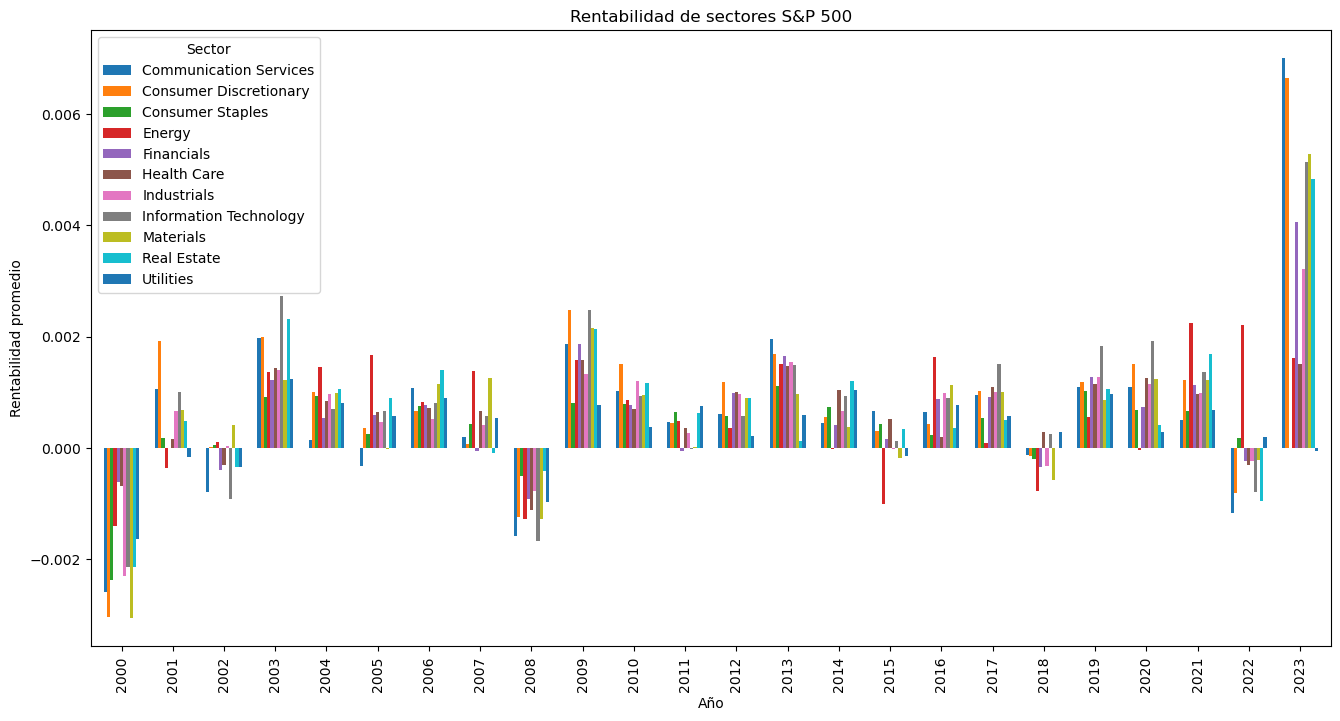

In [78]:
# Comportamiendo de la rentabilidad promedio durante los últimos 23 años

    # Gráfico de barras 

sector_año1.plot(kind='bar',figsize=(16,8),width=0.7)

    # Ejes y etiquetas

plt.xlabel('Año')
plt.ylabel('Rentabilidad promedio')
plt.title('Rentabilidad de sectores S&P 500')


plt.show()

**Sector más rentable**

In [79]:
# Se valida el sector que mas rentabilidad promedio genera

sector = df_all.groupby(['Sector'])['Rentabilidad'].mean()

print(f'Information Technology, Consumer Discretionary y Health Care son los sectores con más rentabilidad promedio.')

sector.sort_values(ascending=False)


Information Technology, Consumer Discretionary y Health Care son los sectores con más rentabilidad promedio.


Sector
Information Technology    0.000719
Consumer Discretionary    0.000669
Health Care               0.000616
Energy                    0.000595
Real Estate               0.000581
Industrials               0.000558
Financials                0.000528
Materials                 0.000526
Communication Services    0.000488
Consumer Staples          0.000401
Utilities                 0.000368
Name: Rentabilidad, dtype: float64

**Sector más estable.**<br>
Es el sector que menos años presenta una rentabilidad negativa (Rentabilidad<0).


In [81]:
#Se calcula el número de años que un sector ha generado una rentabilidad promedio negativa.

renta_neg=sector_año.reset_index()

renta_neg=renta_neg[renta_neg['Rentabilidad']<0] # renta descreciente

renta_neg=renta_neg['Sector'].value_counts()

print(f'los sectores más estables son Consumer Staples, Health Care y Consumer Discretionary')
renta_neg

los sectores más estables son Consumer Staples, Health Care y Consumer Discretionary


Energy                    7
Financials                7
Communication Services    6
Materials                 6
Utilities                 6
Industrials               5
Information Technology    5
Real Estate               5
Consumer Discretionary    4
Health Care               4
Consumer Staples          3
Name: Sector, dtype: int64

**Día idóneo de inversión.**
Se establece que día es el mejor para invertir observando el cierre del valor de las acciones de las compañías del S&P 500 agrupadas por sectores.<br>

- Se analiza el dataset #2: *df_day*

In [82]:
df_day

,sym,name,sector,lunes,martes,miercoles,jueves,viernes
0,MMM,3M,Industrials,87.447815,87.711402,87.514287,87.637020,87.559631
1,AOS,A. O. Smith,Industrials,21.533563,21.722292,21.596988,21.641366,21.612569
2,ABT,Abbott,Health Care,37.045023,37.258741,37.109522,37.221452,37.127603
3,ABBV,AbbVie,Health Care,69.386463,69.998222,69.931846,69.967578,70.018031
4,ACN,Accenture,Information Technology,87.398437,88.368002,87.877815,88.104606,87.828913
...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,41.909495,42.217464,42.048658,42.164244,42.122698
499,ZBRA,Zebra Technologies,Information Technology,99.819330,100.691150,100.110990,100.233740,99.726649
500,ZBH,Zimmer Biomet,Health Care,79.471004,80.000261,79.724415,79.911347,79.739963
501,ZION,Zions Bancorporation,Financials,35.506410,35.649186,35.628951,35.683860,35.750120


In [83]:
# Se agrupa por sector y promedio 

df_day=df_day.groupby(df_day['sector'])[df_day.columns].mean().reset_index()
df_day

,sector,lunes,martes,miercoles,jueves,viernes
0,Communication Services,50.743653,50.953956,50.775516,50.891826,50.717520
1,Consumer Discretionary,111.998956,113.034588,112.466659,112.663153,112.462832
2,Consumer Staples,45.894324,46.204001,46.023391,46.080040,46.030467
3,Energy,38.801584,39.093570,38.990408,39.011741,39.063509
4,Financials,64.003129,64.380882,64.179502,64.294742,64.254045
5,Health Care,78.279738,78.904892,78.589586,78.761871,78.604526
6,Industrials,61.499451,61.991264,61.710754,61.804014,61.782627
7,Information Technology,65.667074,66.290697,66.019418,66.106138,65.885261
8,Materials,49.752875,50.138358,49.969640,50.025692,49.976874
9,Real Estate,54.058327,54.430797,54.228141,54.336368,54.271974


Se observa que para la mayoria de los sectores, las compañias alcanzan su precio máximo los días martes.


- Se analiza el dataset #1: *df_año*

In [90]:
df_año

,sym,name,years_in,sector,2000,2001,2002,2003,2004,2005,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,MMM,3M,66,Industrials,25.200357,31.196935,34.838571,40.182976,48.675238,47.161429,...,109.134167,122.420238,135.597024,169.364542,178.208207,156.187976,143.989051,174.957540,134.120837,120.1905
1,AOS,A. O. Smith,6,Industrials,1.965556,2.016935,3.157500,3.656746,3.558770,3.719683,...,21.640913,30.359524,38.260437,49.987331,53.185378,45.092579,45.607708,66.996429,60.582351,60.3715
2,ABT,Abbott,66,Health Care,11.124127,13.576694,12.654167,11.671706,12.824484,14.371508,...,34.765238,40.130635,35.929087,44.160677,59.562749,75.982063,92.162806,118.276508,110.497968,111.6425
3,ABBV,AbbVie,11,Health Care,NaN,NaN,NaN,NaN,NaN,NaN,...,38.721032,44.695397,45.319603,58.355259,78.153386,65.653690,81.035929,105.845754,145.062829,153.0580
4,ACN,Accenture,12,Information Technology,NaN,13.048468,14.747024,14.160714,18.274484,18.302857,...,69.978016,85.882937,101.475238,118.477729,149.153267,172.536349,205.397668,302.624008,297.484582,275.4665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,26,Consumer Discretionary,3.891944,5.445242,7.148532,7.265516,10.045516,12.807222,...,45.303333,50.010000,52.895119,65.430398,77.742191,97.441270,88.743953,116.094444,117.447251,128.1310
499,ZBRA,Zebra Technologies,4,Information Technology,22.327103,20.321048,24.501230,33.005595,52.081627,44.097341,...,71.196667,89.878492,64.032024,99.310319,150.661315,206.708492,266.642490,518.283373,343.300319,293.8120
500,ZBH,Zimmer Biomet,22,Health Care,NaN,25.764766,31.629365,44.753016,69.180556,67.243452,...,91.774087,99.237024,104.580159,110.002869,109.874861,121.117421,126.891186,146.466071,115.379880,124.8605
501,ZION,Zions Bancorporation,22,Financials,33.280278,37.724395,35.043690,37.528333,44.998690,53.290397,...,24.547381,24.094008,24.514167,38.088566,45.483944,41.532024,32.804190,54.069325,56.120279,50.7540


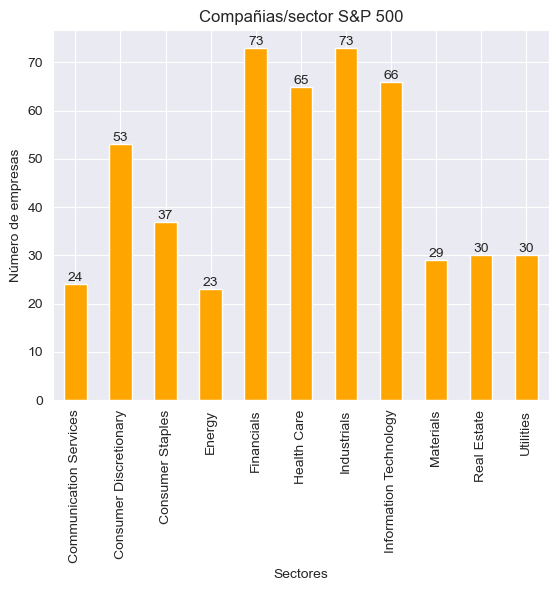

In [98]:
# Se grafica la cantidad de compañias por sector


sns.set_style("darkgrid")

# Calidad de imagen
plt.rcParams['figure.dpi'] = 100

empresas_por_sector = df_año.groupby('sector')['sym'].nunique()
ax = empresas_por_sector.plot(kind='bar', color='orange')

# Etiquetas de barras
for i, v in enumerate(empresas_por_sector.values):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.title('Compañias/sector S&P 500')
plt.xlabel('Sectores')
plt.ylabel('Número de empresas')
plt.show()

**Compañias con más tiempo en el index.**<br>
Se emplea la variable 'years_in' para determinar el tiempo que las compañias han estado en S&P 500.

In [94]:
# Top 10 compañias con mayor tiempo en S&P 500

df1=df_año.iloc[:, [1, 3, 2]]

df1=df1.sort_values(by=df1.columns[2], ascending=False).head(10).reset_index(drop=True)
df1

,name,sector,years_in
0,Texas Instruments,Information Technology,70
1,Whirlpool Corporation,Consumer Discretionary,69
2,3M,Industrials,66
3,John Deere,Industrials,66
4,Exelon,Utilities,66
5,S&P Global,Financials,66
6,Schlumberger,Energy,66
7,Entergy,Utilities,66
8,Sealed Air,Materials,66
9,Edison International,Utilities,66


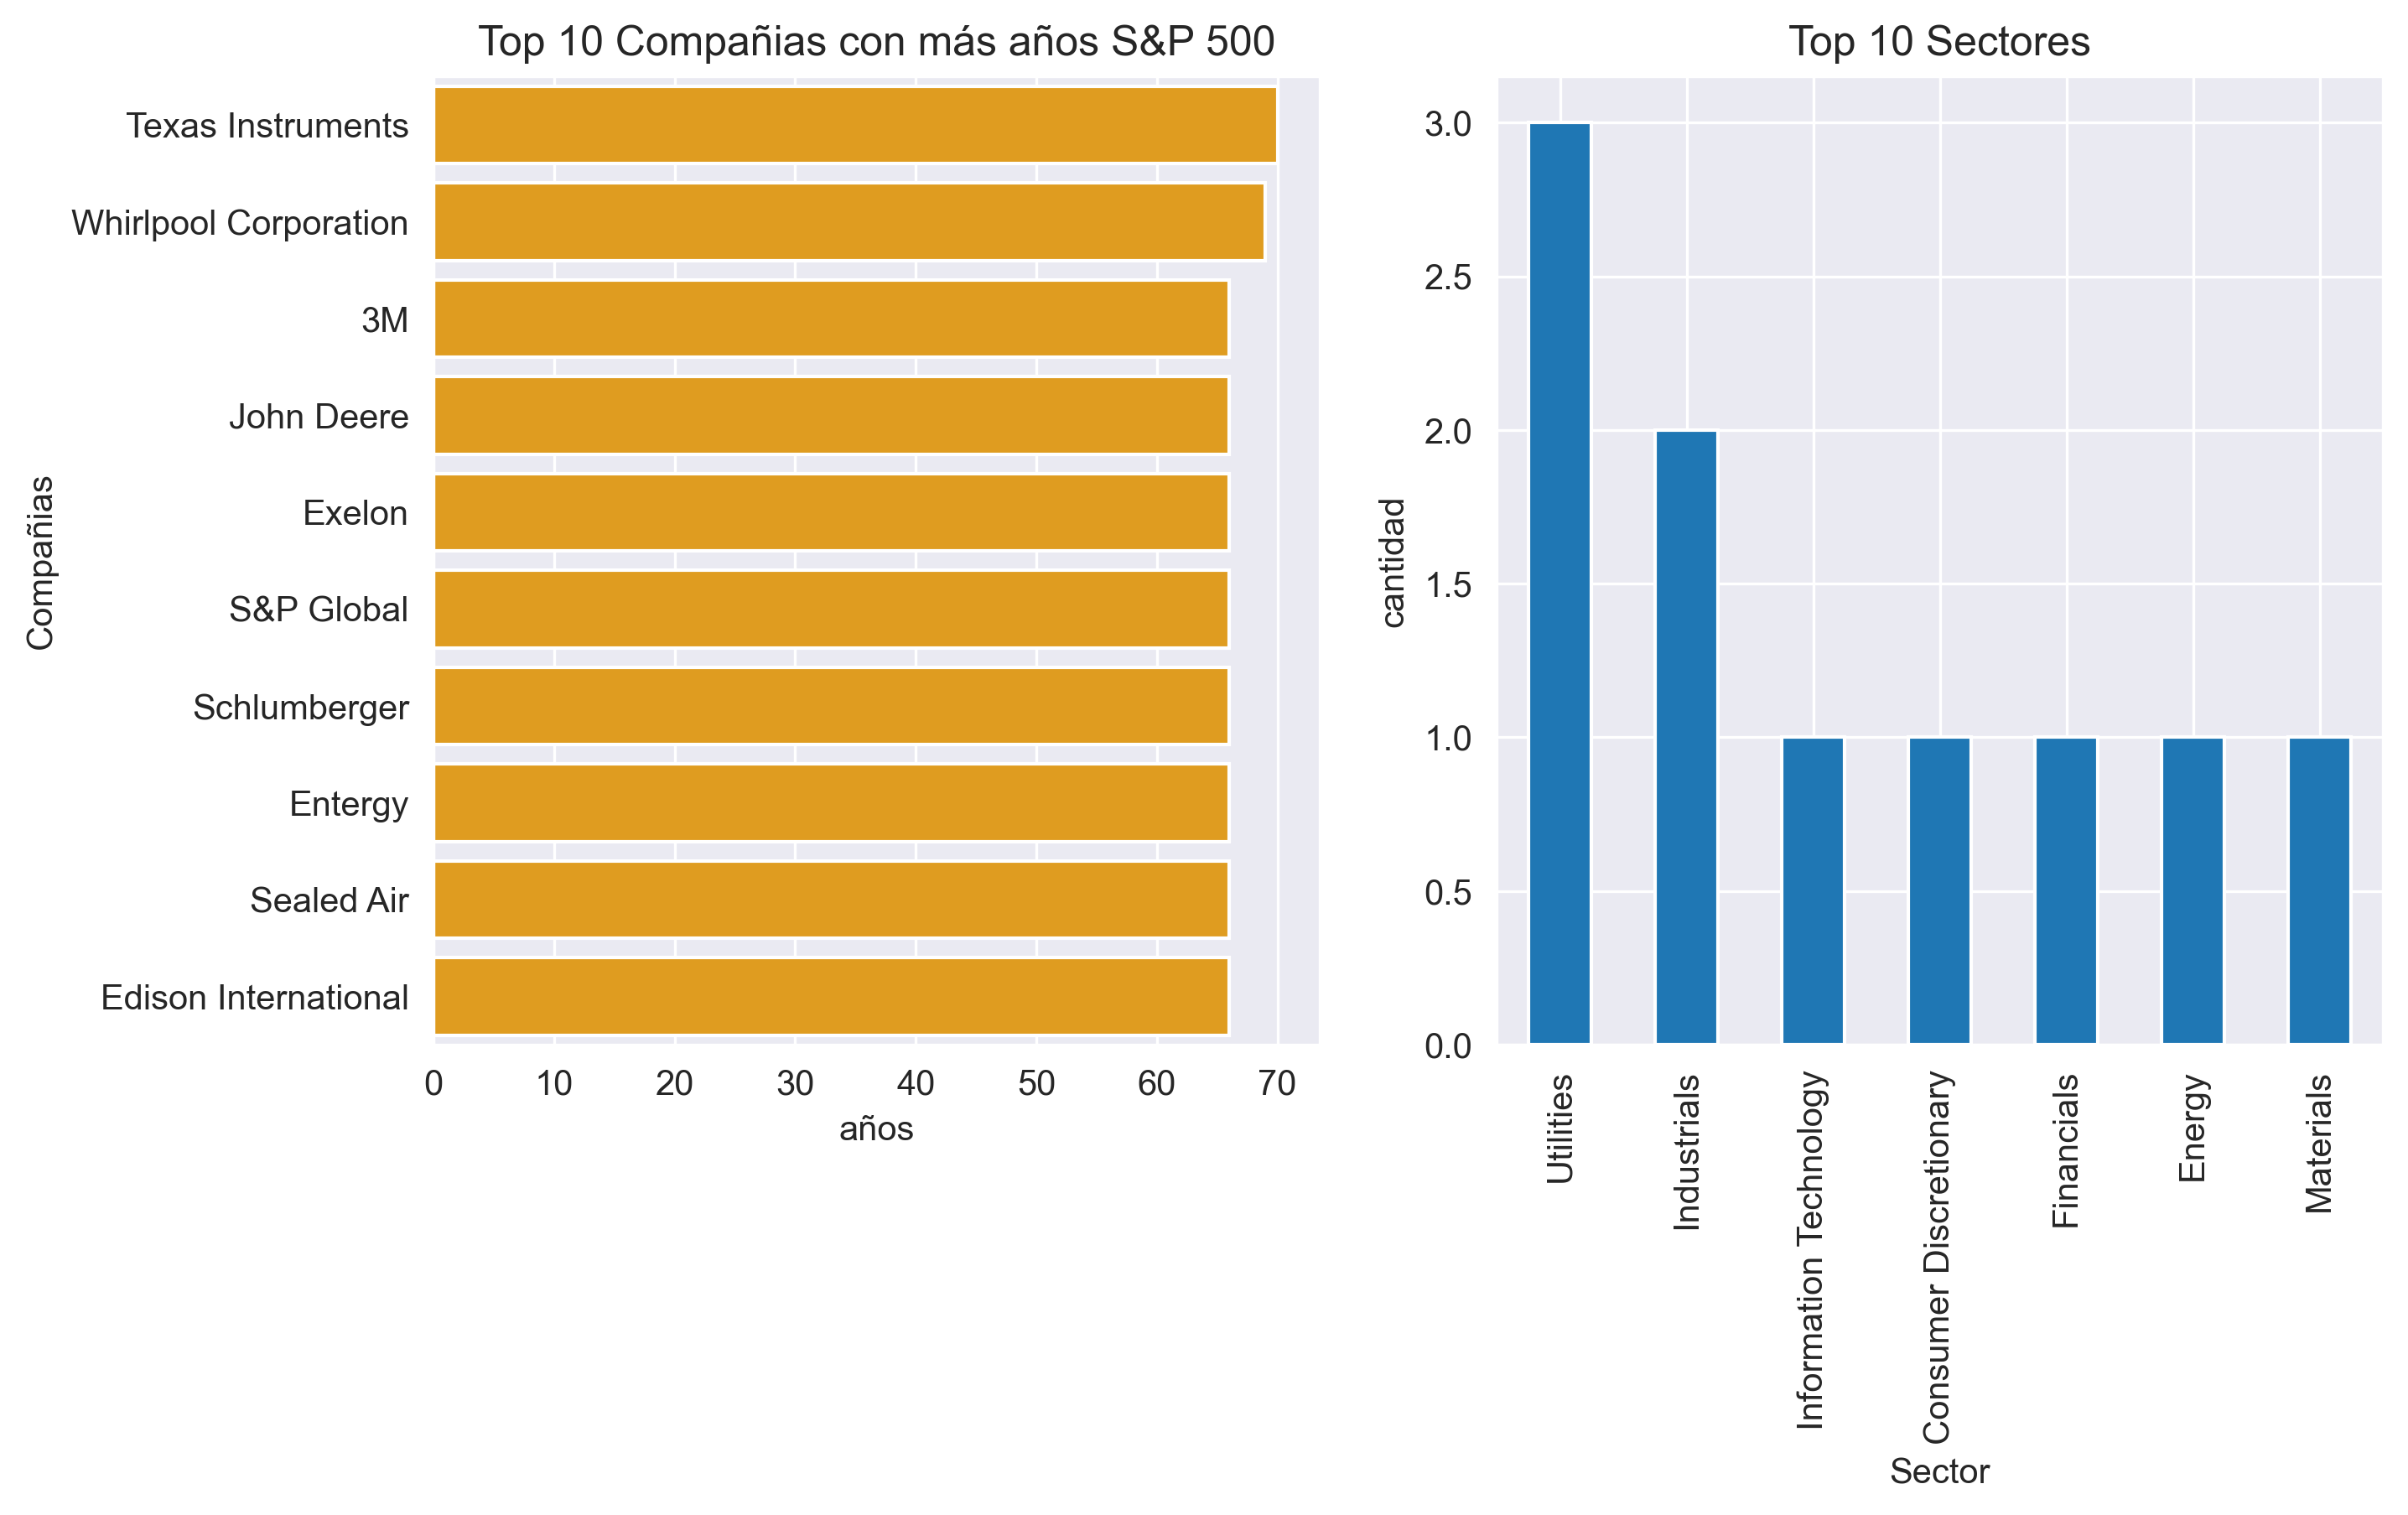

In [95]:
# Se crea subplot
fig, ax = plt.subplots(1, 2, figsize=(10, 5),dpi=300)

# Grafica de películas más vistas

sns.barplot(y='name', x='years_in', data=df1, color='orange', ax=ax[0])

# Etiquetas y título para la primera gráfica
ax[0].set_xlabel('años')
ax[0].set_ylabel('Compañias')
ax[0].set_title('Top 10 Compañias con más años S&P 500')

# Graficar la segunda gráfica en el subplot
df1['sector'].value_counts().plot.bar(ax=ax[1])

# Etiquetas y título para la segunda gráfica
ax[1].set_title('Top 10 Sectores')
ax[1].set_xlabel('Sector')
ax[1].set_ylabel('cantidad')

plt.show()

**Compañias con más rentabilidad en los últimos 23 años.**



In [124]:
# RENTABILIDAD HISTORICA DEL AÑO 2000 AL 2023 (Top 10)

# Se toma las variables a analizar a travez de sus indices de columnas
df1_5 = df_año.iloc[:, [1, 3] + list(range(4, 28))]


df1_5['pct_change %'] = df1_5.iloc[:, [2,25]].pct_change(axis='columns')['2023'] 


# Se ordena el dataframe descendentemente en 'pct_change %'

df1_5=df1_5.sort_values(by='pct_change %', ascending=False).head(10).reset_index(drop=True)

df1_5[['name','pct_change %']].head(3)

,name,pct_change %
0,Monster Beverage,1101.039553
1,Old Dominion,346.363766
2,Tractor Supply,286.971000


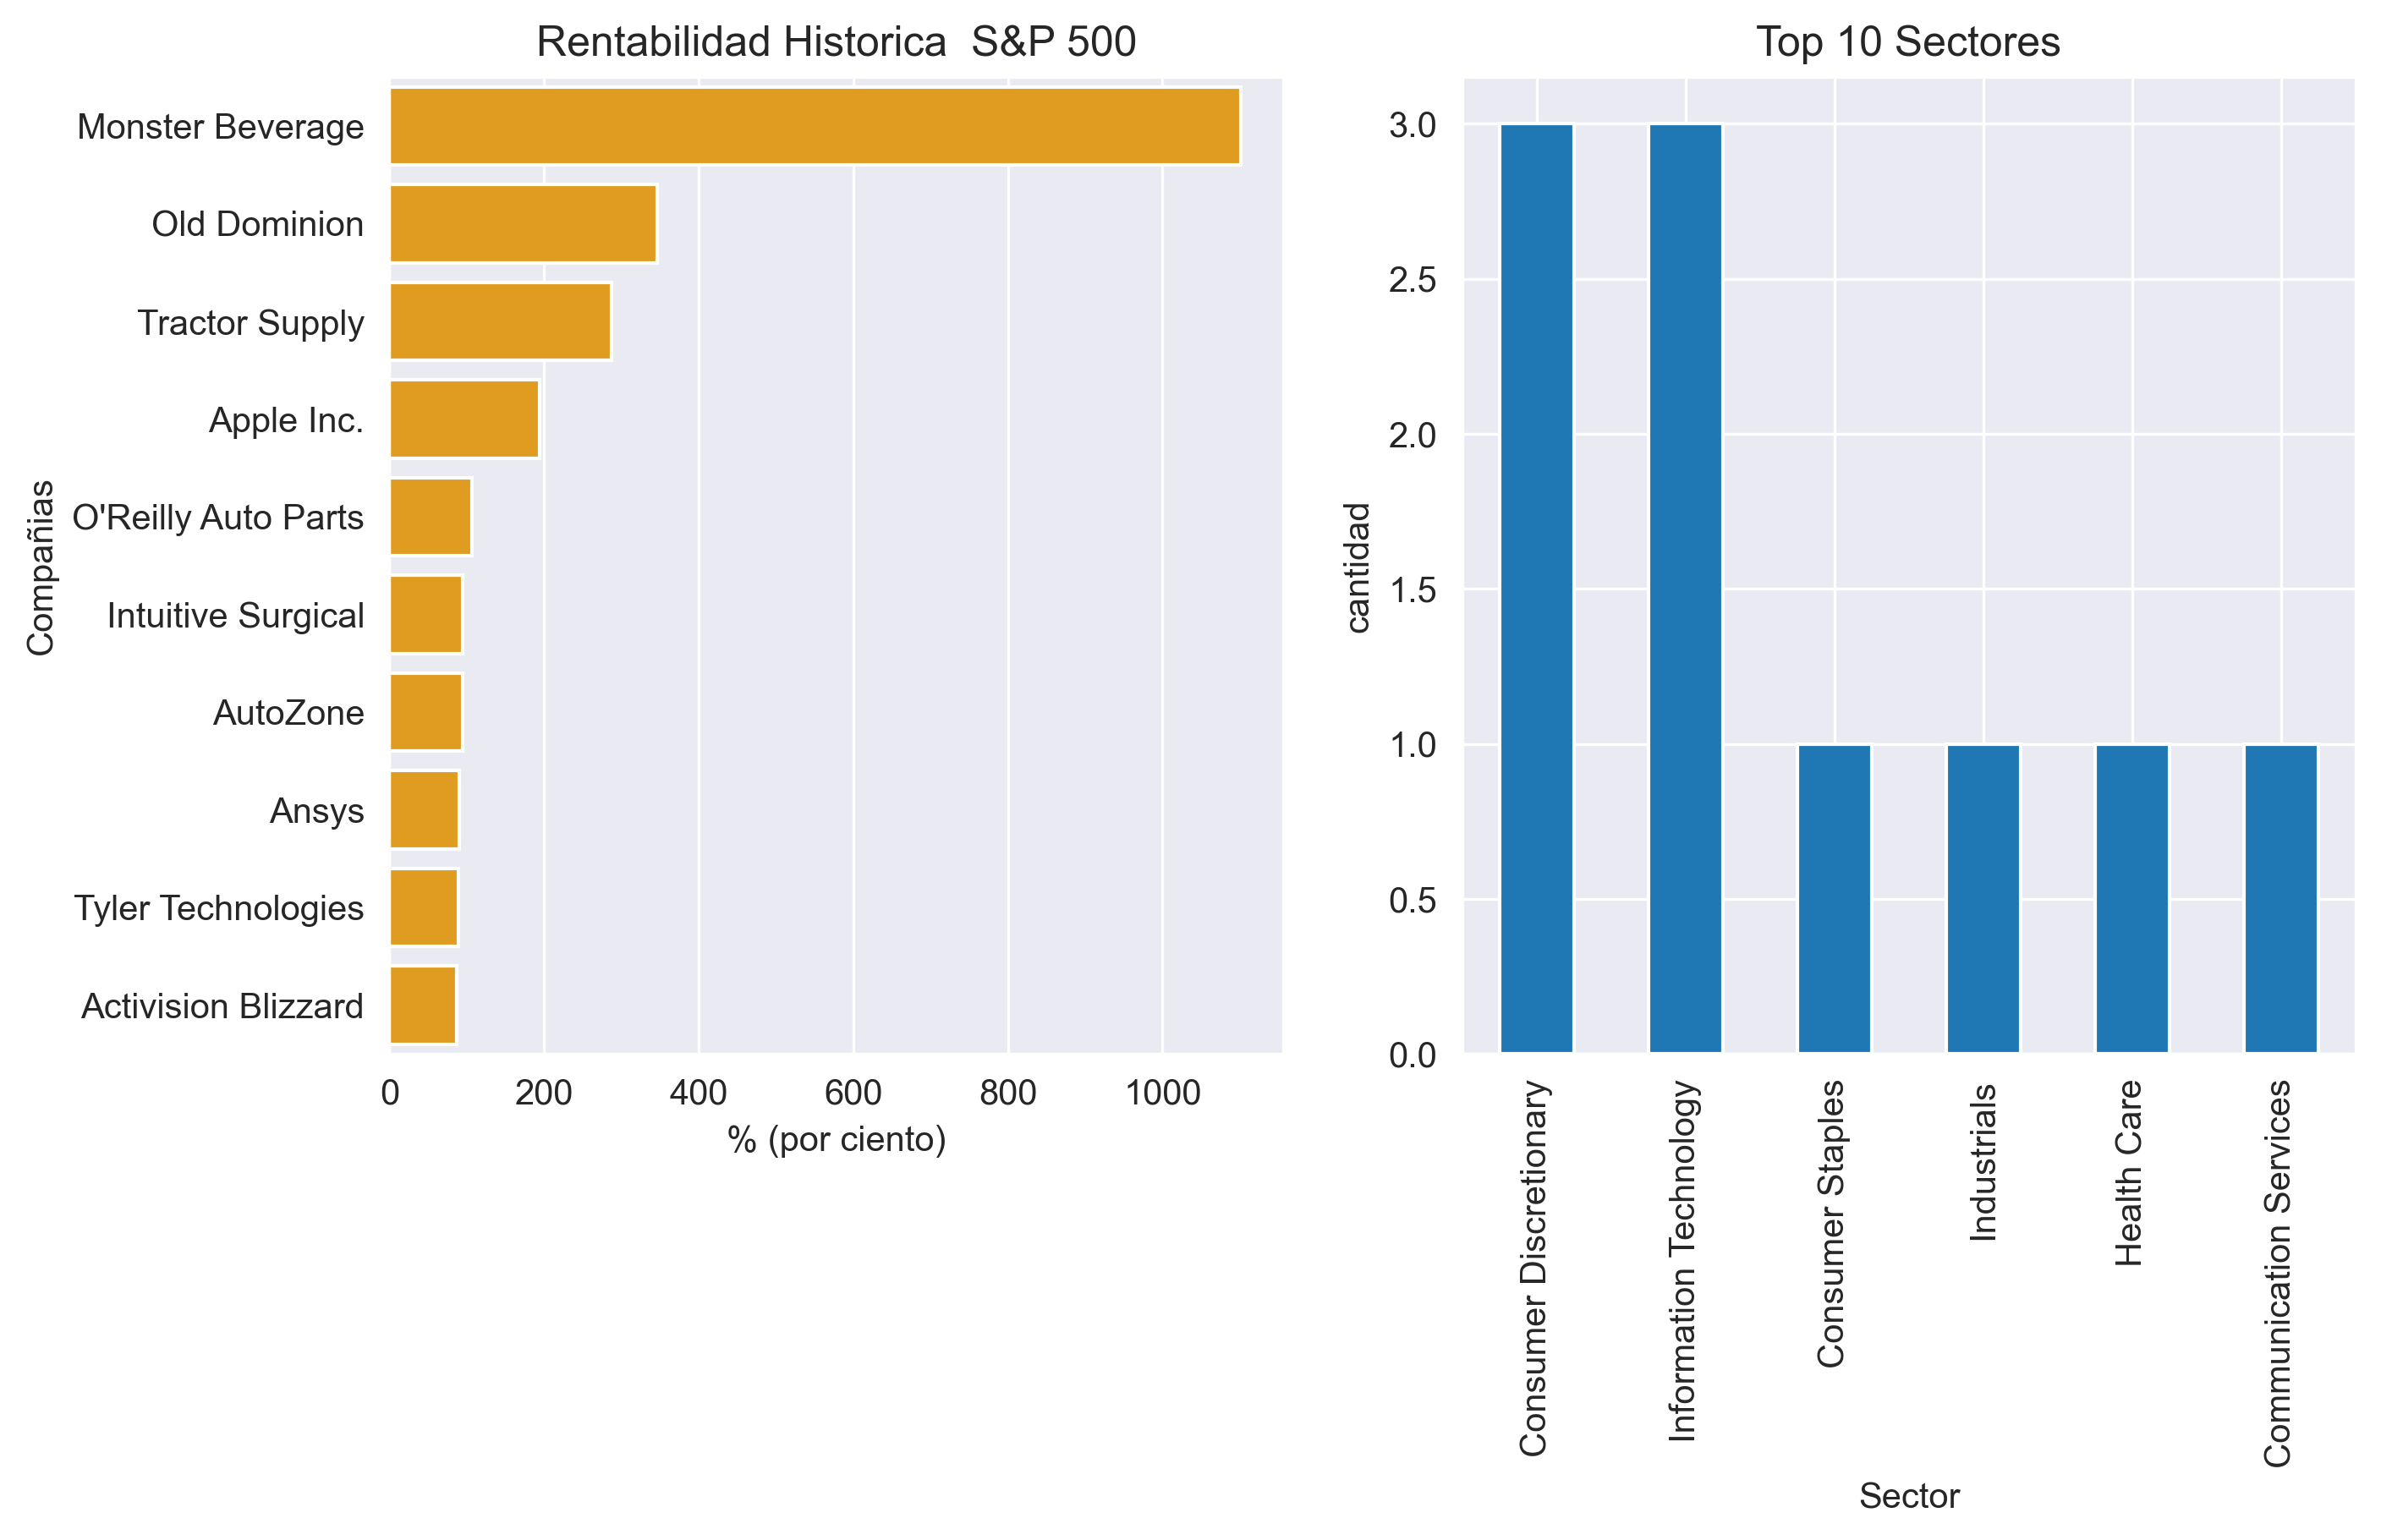

In [120]:
# Se crea subplot
fig, ax = plt.subplots(1, 2, figsize=(10, 5),dpi=300)

# Grafica 

sns.barplot(y='name', x='pct_change %', data=df1_5, color='orange', ax=ax[0])

# Etiquetas y título para la primera gráfica
ax[0].set_xlabel('% (por ciento)')
ax[0].set_ylabel('Compañias')
ax[0].set_title('Rentabilidad Historica  S&P 500')

# Graficar la segunda gráfica en el subplot
df1_5['sector'].value_counts().plot.bar(ax=ax[1])

# Etiquetas y título para la segunda gráfica
ax[1].set_title('Top 10 Sectores')
ax[1].set_xlabel('Sector')
ax[1].set_ylabel('cantidad')

plt.show()

**TOP 10 Compañias con más rentabilidad en los últimos 5 años.**

In [128]:
# RENTABILIDAD ULTIMOS 5 AÑOS (Top 10)

df2=df_año.iloc[:, [1, 3, 22,23,24,25,26, 27]] # Se toma el rango de años para el analisis
df2.columns=['name','sector','año_18','año_19','año_20','año_21', 'año_22', 'año_23'] 

# Se calcula la variable el 'pct_change' 
df2['pct_change %'] = df2.iloc[:, [2,3,4,5,6,7]].pct_change(axis='columns')['año_23'] 

# Se ordena el dataframe descendentemente en 'pct_change'
df2=df2.sort_values(by='pct_change %', ascending=False).head(10).reset_index(drop=True)
df2

,name,sector,año_18,año_19,año_20,año_21,año_22,año_23,pct_change %
0,First Solar,Information Technology,57.263506,57.448373,61.486917,91.680278,101.011713,168.1890,0.665045
1,Las Vegas Sands,Consumer Discretionary,61.282988,57.548571,51.857194,49.261667,38.941076,54.5215,0.400103
2,Steel Dynamics,Materials,39.307809,28.952063,27.322727,55.256627,78.826534,108.3555,0.374607
3,Wynn Resorts,Consumer Discretionary,145.483227,119.109921,90.649960,108.562500,71.395259,97.4870,0.365455
4,Schlumberger,Energy,54.444980,35.115159,19.855020,28.516627,41.214104,55.7480,0.352644
5,Fair Isaac,Information Technology,190.153984,300.860476,406.222530,463.178929,461.844263,624.0845,0.351288
6,Lamb Weston,Consumer Staples,63.022072,68.140952,67.292055,69.309484,72.370558,96.4870,0.333236
7,Hess Corporation,Energy,53.621155,57.593770,46.216166,73.242262,113.004940,148.9205,0.317823
8,Marathon Petroleum,Energy,61.211474,50.240437,33.648933,55.034325,92.751155,121.8675,0.313919
9,Arch Capital Group,Financials,28.404064,36.445079,32.830000,39.347183,48.466335,63.4990,0.310167


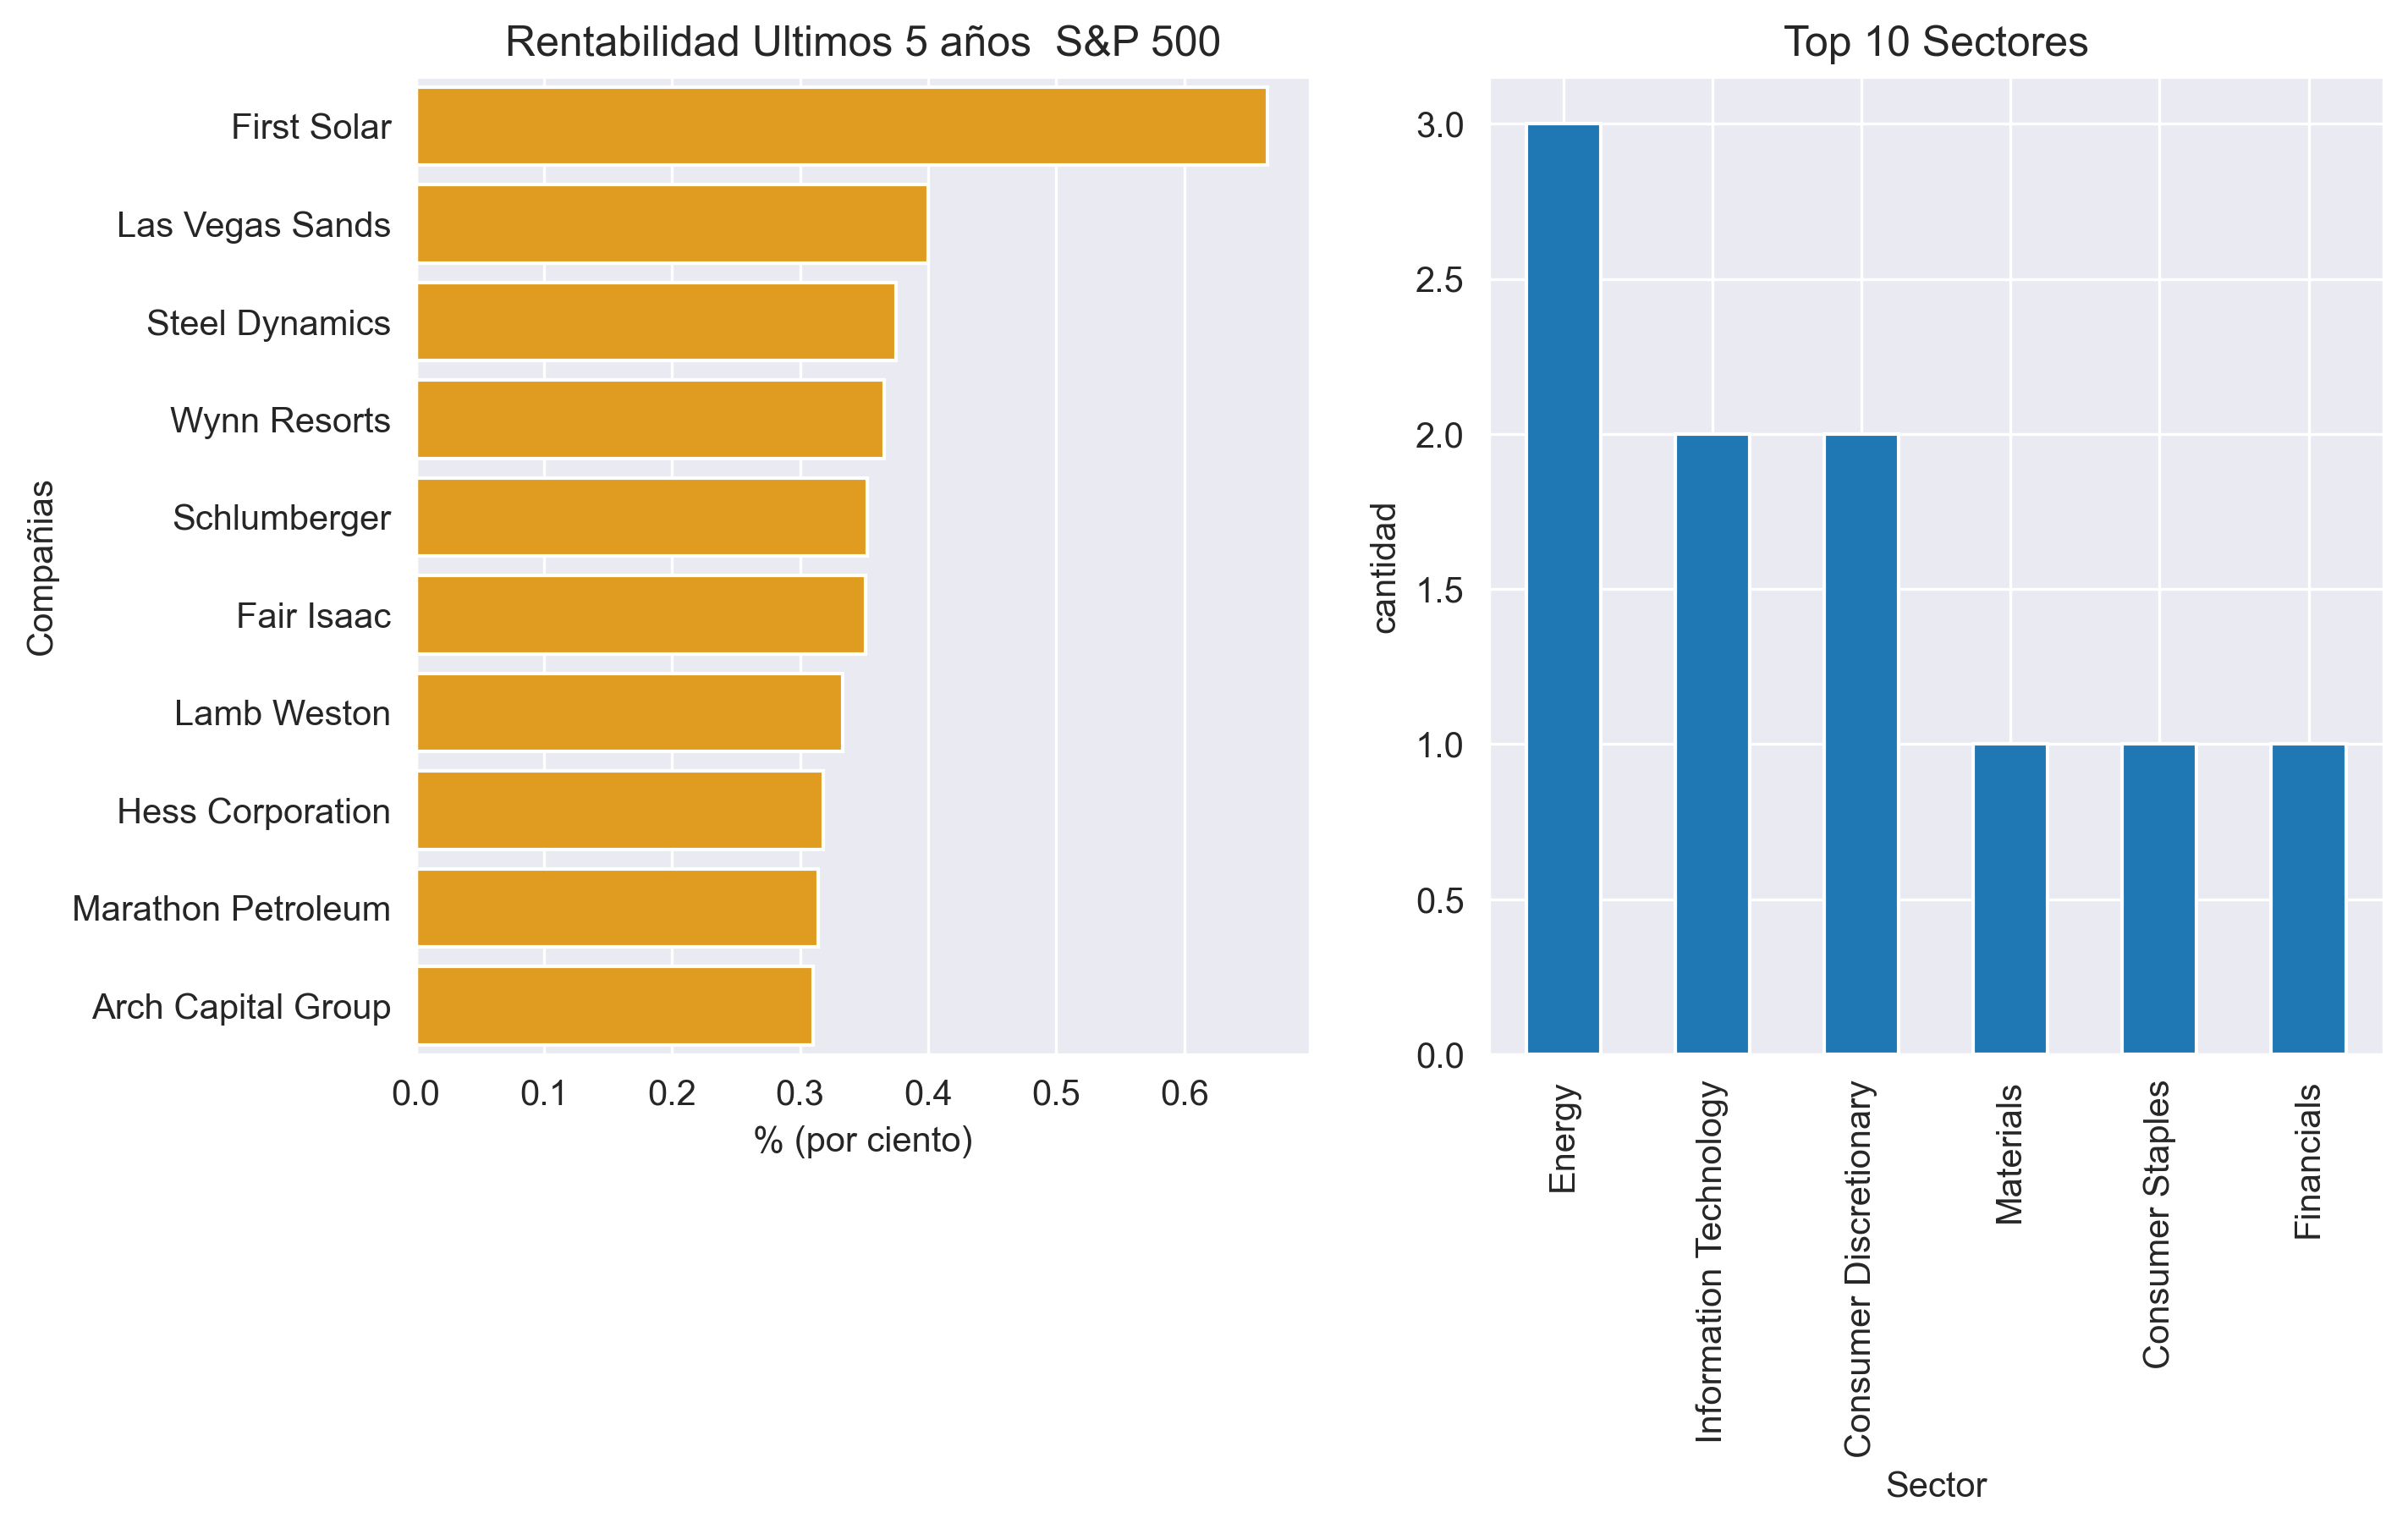

In [129]:
# Se crea subplot
fig, ax = plt.subplots(1, 2, figsize=(10, 5),dpi=300)

# Grafica 

sns.barplot(y='name', x='pct_change %', data=df2, color='orange', ax=ax[0])

# Etiquetas y título para la primera gráfica
ax[0].set_xlabel('% (por ciento)')
ax[0].set_ylabel('Compañias')
ax[0].set_title('Rentabilidad Ultimos 5 años  S&P 500')

# Graficar la segunda gráfica en el subplot
df2['sector'].value_counts().plot.bar(ax=ax[1])

# Etiquetas y título para la segunda gráfica
ax[1].set_title('Top 10 Sectores')
ax[1].set_xlabel('Sector')
ax[1].set_ylabel('cantidad')

plt.show()

**TOP 10 Compañias con más rentabilidad en los últimos 10 años.**

In [130]:
# RENTABILIDAD ULTIMOS 10 AÑOS (Top 10)

df3=df_año.iloc[:, [1, 3] + list(range(16, 28))]
df3 = df3.rename(columns={df3.columns[13]: 'año_23'})

# Se calcula la variable el 'pct_change' 
df3['pct_change %'] = df3.iloc[:, [2,13]].pct_change(axis='columns')['año_23'] 

# Se ordena el dataframe descendentemente en 'pct_change'
df3=df3.sort_values(by='pct_change %', ascending=False).head(10).reset_index(drop=True)

df3

,name,sector,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,año_23,pct_change %
0,"Tesla, Inc.",Consumer Discretionary,2.077640,6.960476,14.888690,15.336071,13.984643,20.954622,21.153785,18.235198,96.665771,259.998175,263.093147,134.1960,63.590593
1,Nvidia,Information Technology,3.100720,3.313571,4.415873,5.746746,13.210992,37.007012,57.565100,43.410119,98.650672,194.943175,185.545060,172.7040,54.698031
2,Enphase,Information Technology,5.283069,6.601468,10.285437,7.992817,1.887540,1.390598,4.705817,17.570079,70.160435,176.686389,225.265976,230.9965,42.723924
3,Dexcom,Health Care,2.987600,5.742302,10.420952,18.997897,18.443770,17.154821,24.742151,38.275992,86.538893,115.250635,98.714900,108.5930,35.347905
4,Netflix,Communication Services,11.855120,35.271825,57.495079,91.895675,102.030357,165.374263,319.290319,328.872381,446.827233,558.217698,284.639243,334.7590,27.237504
5,Monolithic Power Systems,Information Technology,16.953440,24.683889,37.460079,50.042460,65.914206,95.622510,121.257171,140.050476,234.705375,417.435754,412.649044,395.5590,22.332079
6,Broadcom Inc.,Information Technology,25.775520,29.419960,57.182262,99.018889,125.524286,192.021793,200.715777,251.445119,294.530672,467.728968,527.059880,573.0735,21.233247
7,EPAM Systems,Information Technology,17.851733,27.985317,40.694087,68.421667,68.560873,83.137809,123.068765,177.125437,267.671542,518.647698,355.238008,336.3240,17.839851
8,MSCI,Financials,30.044320,33.391111,40.987262,57.077421,72.460357,100.898685,149.865339,211.922937,333.386364,527.340913,465.637251,498.1005,15.578858
9,Old Dominion,Industrials,19.694160,27.799048,41.657063,45.126706,44.585040,64.731434,94.255339,104.228095,166.545731,270.348254,282.512271,311.5660,14.820223


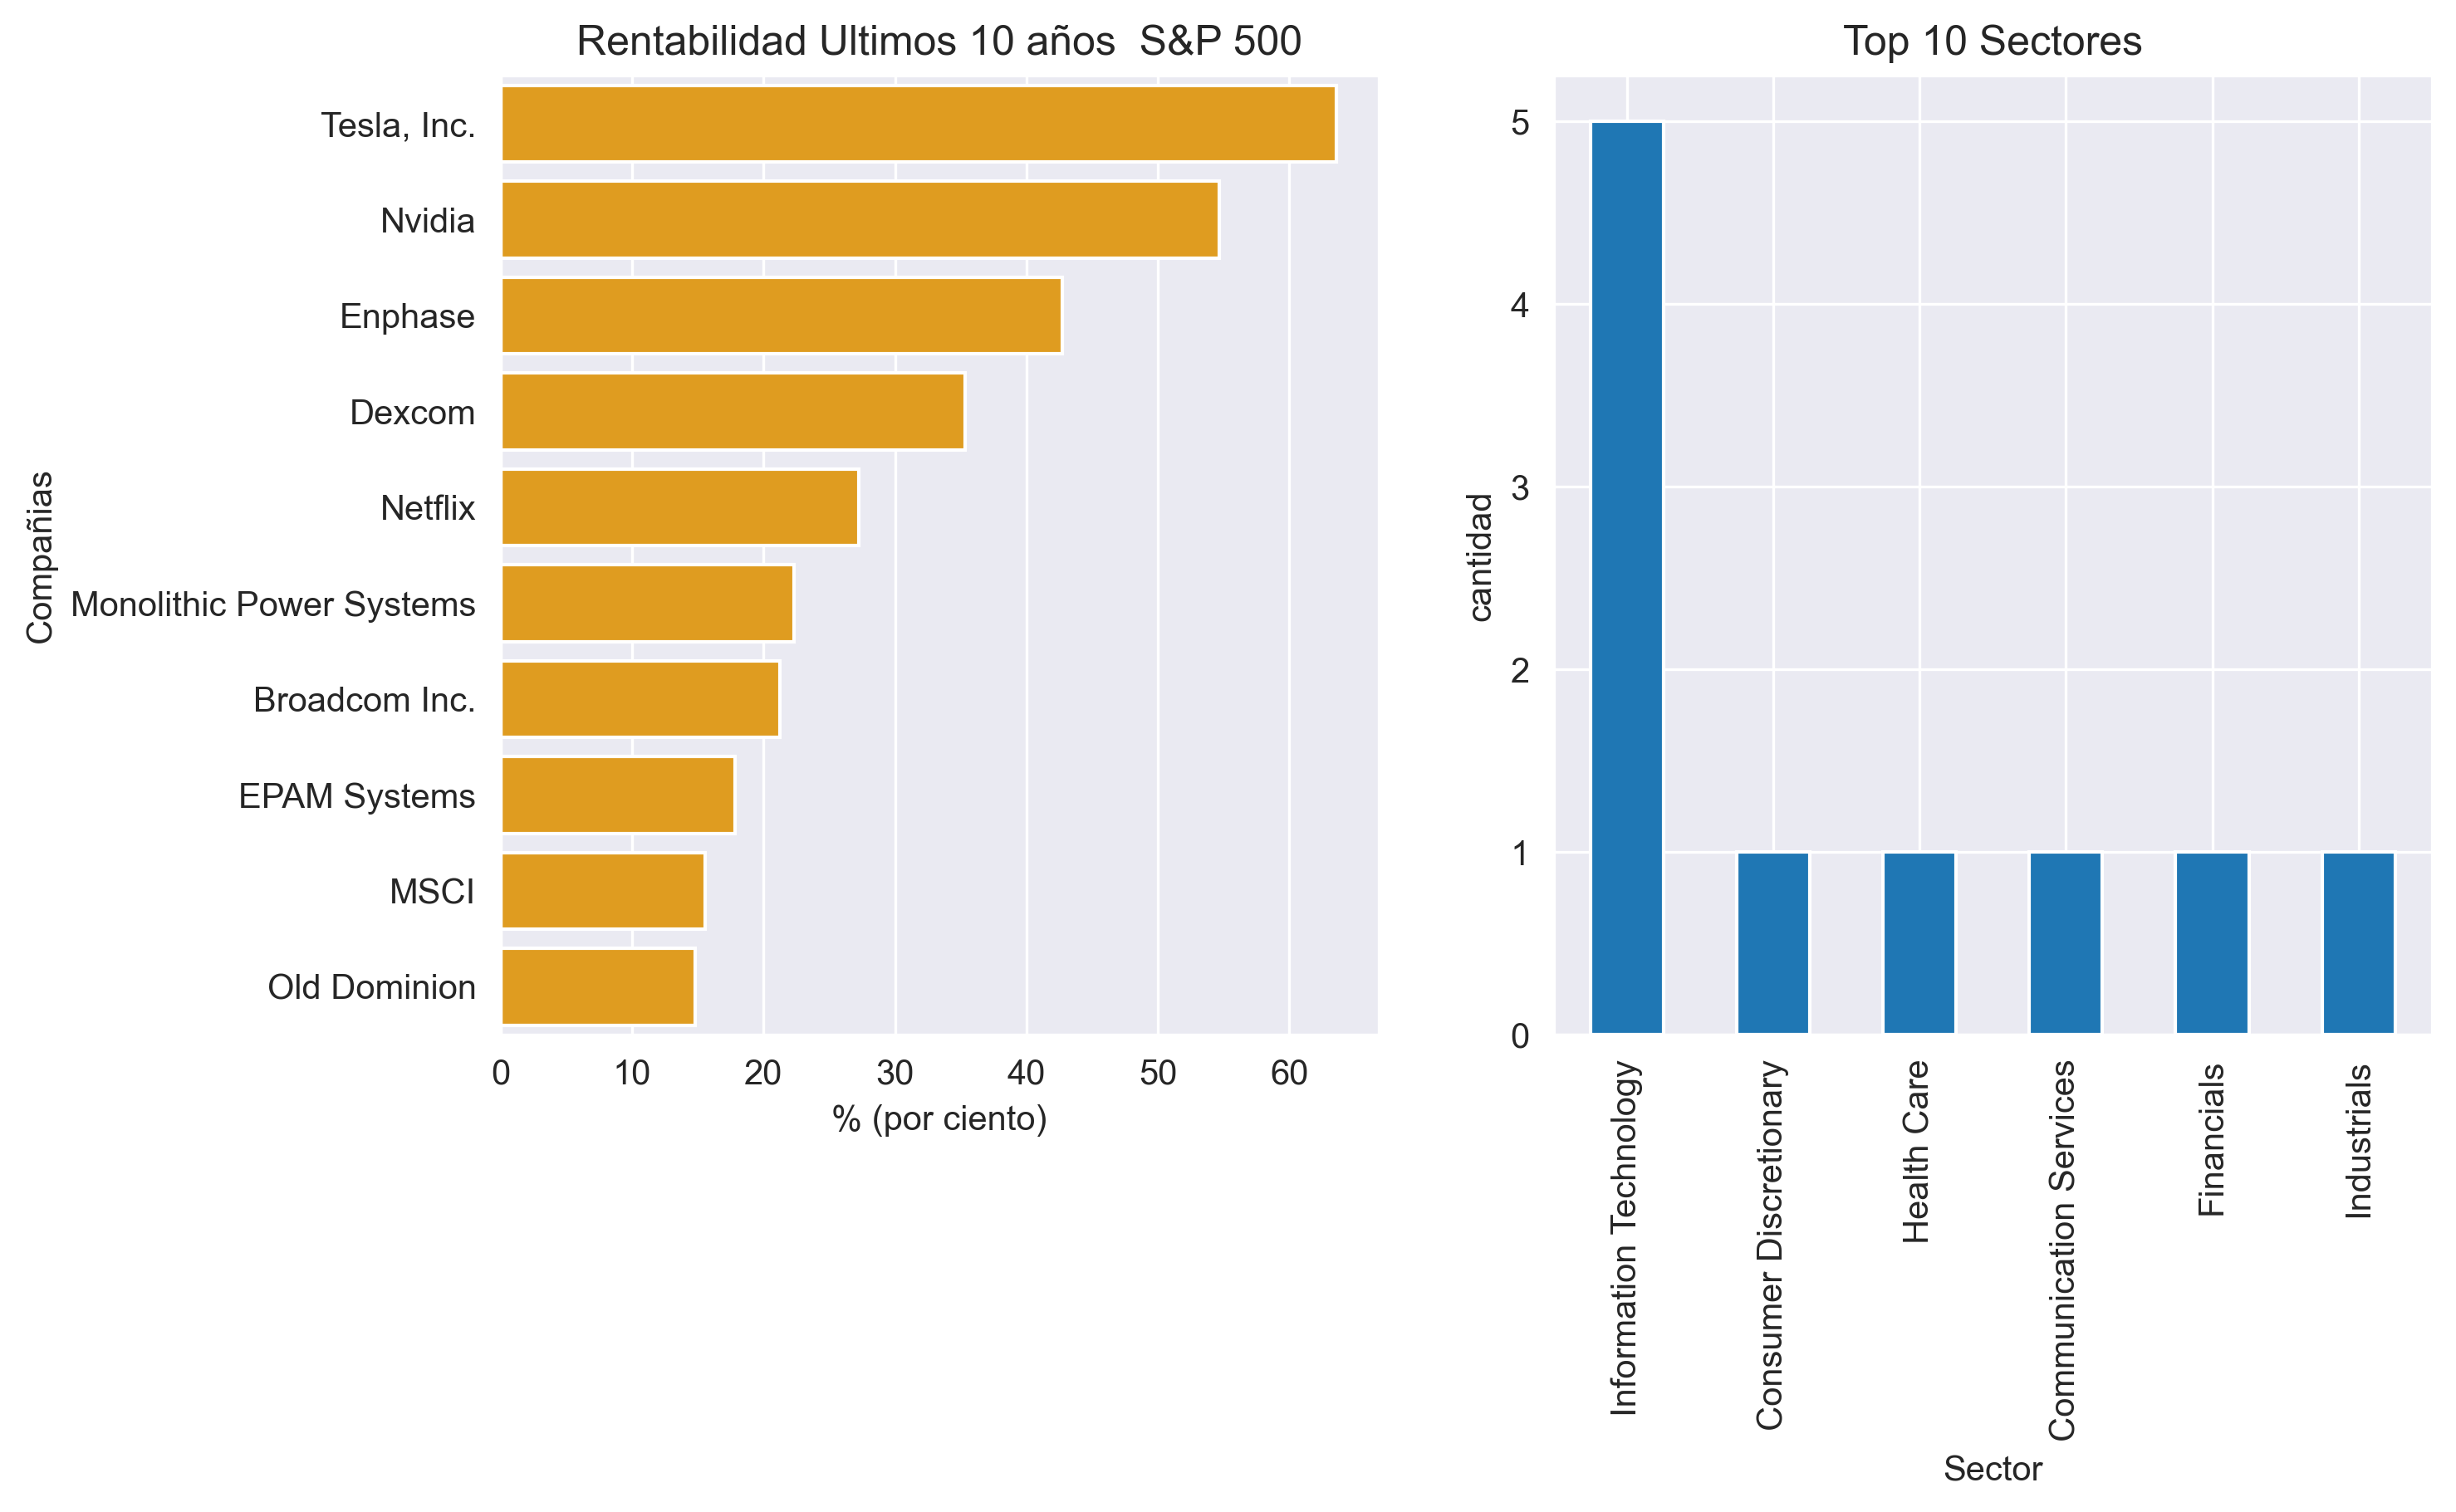

In [131]:
# Se crea subplot
fig, ax = plt.subplots(1, 2, figsize=(10, 5),dpi=300)

# Grafica 

sns.barplot(y='name', x='pct_change %', data=df3, color='orange', ax=ax[0])

# Etiquetas y título para la primera gráfica
ax[0].set_xlabel('% (por ciento)')
ax[0].set_ylabel('Compañias')
ax[0].set_title('Rentabilidad Ultimos 10 años  S&P 500')

# Graficar la segunda gráfica en el subplot
df3['sector'].value_counts().plot.bar(ax=ax[1])

# Etiquetas y título para la segunda gráfica
ax[1].set_title('Top 10 Sectores')
ax[1].set_xlabel('Sector')
ax[1].set_ylabel('cantidad')

plt.show()

Los sectores que más rentabilidad Son Information Technology, consumer Discretionary  y Energy.

Se analiza a detalle con base al EDA realizado las siguientes compañias:<br>
- Monster Beverage
- Tesla INC
- Nvidia